In [ ]:
# Snippets and examples

### Getting estimator parameters

In [55]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC()
clf.set_params(kernel='linear', verbose=False).fit(X, y)
s = clf.predict(X_test)

print(classif.get_params())


{'estimator__kernel': 'rbf', 'n_jobs': 1, 'estimator__degree': 3, 'estimator__gamma': 'auto', 'estimator__class_weight': None, 'estimator__random_state': 0, 'estimator__C': 1.0, 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__cache_size': 200, 'estimator__verbose': False, 'estimator__shrinking': True, 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False), 'estimator__tol': 0.001, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': None}


### LabelBinarizer and MultiLabelBinarizer

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]]
[[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [1 0 1 0 0]]


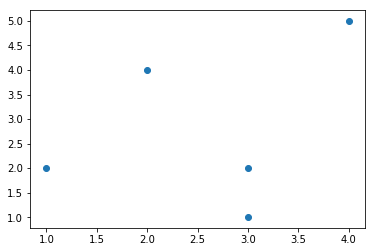

In [1]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
y = LabelBinarizer().fit_transform(y) 
print(classif.fit(X, y).predict(X))

y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
print(classif.fit(X, y).predict(X))

Xs = [i[0] for i in X]
Ys = [i[1] for i in X]
plt.scatter(Xs, Ys)
plt.show()


### Using `train_test_split` to split data set

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

[i.shape for i in (X_train, X_test, y_train, y_test)]


[(90, 4), (60, 4), (90,), (60,)]

### Using `cross_val_score` for cross-validation

In [52]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

n_samples = iris.data.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
scores = cross_val_score(clf, iris.data, iris.target, cv=cv)

print(scores)
print("MSE = {:.2e}(+/- {:.2e})".format(scores.mean(), scores.std()))

[ 0.97777778  0.97777778  1.        ]
MSE = 9.85e-01(+/- 1.05e-02)


### Plotting Cross-Validated Predictions

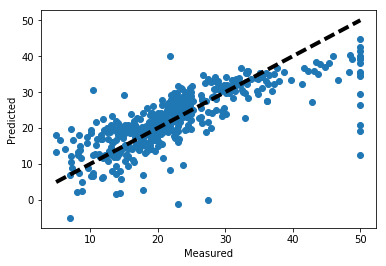

In [5]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Plotting the cross-validation score of a SVC estimator with a linear kernel as a function of parameter C

[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.90260270247335728, 0.9482070815179453, 0.94490714734074643, 0.94379972762867548, 0.94379972762867548]


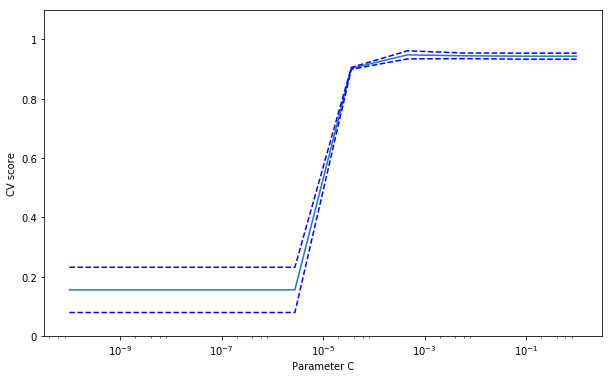

In [21]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)
scores, scores_std = [], []

for curr_c in C_s:
    svc.set_params(C=curr_c)
    curr_scores = cross_val_score(svc, X, y, n_jobs=-1)
    scores.append(curr_scores.mean())
    scores_std.append(curr_scores.std())

print(scores)
# plt.semilogy(C_s, scores)
# plt.show()

plt.figure(1, figsize=(10, 6))
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

### Perform exhaustive search over parameter values for an estimator

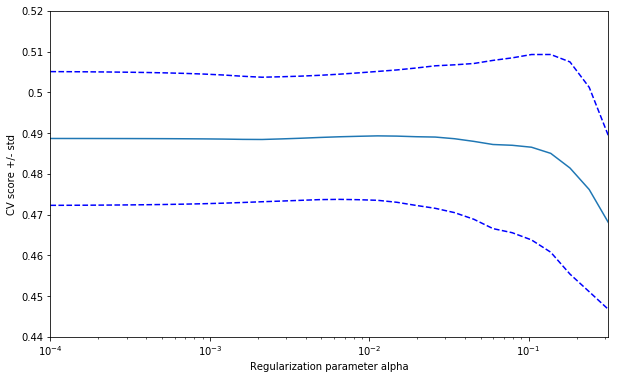

In [50]:
# On the diabetes dataset, find the optimal regularization parameter alpha.

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

lasso = Lasso(random_state=0)

alphas = np.logspace(-4, -0.5, 30)
scores, scores_std = [], []
n_folds = 3

for a in alphas:
    lasso.alpha = a
    curr_scores = cross_val_score(lasso, X, y, n_jobs=-1, cv=n_folds)
    scores.append(curr_scores.mean())
    scores_std.append(curr_scores.std())

plt.figure(1, figsize=(10, 6))
plt.semilogx(alphas, scores)
plt.semilogx(alphas, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score +/- std')
plt.xlabel('Regularization parameter alpha')
plt.xlim([alphas[0], alphas[-1]])
plt.show()
